# Bootstrap Aggregation

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import os
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

from sklearn.utils import resample

In [4]:
# Let's read our data. We prefix the data frame name with "df_" for easier understanding.
df_autodata = pd.read_csv("autompg.csv")

In [5]:
df_autodata.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,carname
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


## we check whether the dataset has any missing values

In [6]:
df_autodata.isnull().mean()

mpg             0.000000
cylinders       0.000000
displacement    0.000000
horsepower      0.015075
weight          0.000000
acceleration    0.000000
model year      0.000000
origin          0.000000
carname         0.000000
dtype: float64

In [7]:
# The below syntax returns the column names which has any missing value
columns_with_missing_values=df_autodata.columns[df_autodata.isnull().any()]

# We pass the column names with missing values to the dataframe to count the number
# of missing values
df_autodata[columns_with_missing_values].isnull().sum()

horsepower    6
dtype: int64

In [8]:
df_autodata['horsepower'].fillna(df_autodata['horsepower'].median(), inplace=True)
df_autodata.drop(['carname'], axis=1, inplace=True)

In [9]:
df_autodata.shape

(398, 8)

In [10]:
columns_with_missing_values=df_autodata.columns[df_autodata.isnull().any()]
df_autodata[columns_with_missing_values].isnull().sum()

Series([], dtype: float64)

In [11]:
df_autodata.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


## Create Bootstrap Samples

In [12]:
def create_bootstrap_oob(df):
    global df_OOB
    global df_bootstrap_sample  
    
    # creating the bootstrap sample
    df_bootstrap_sample = resample(df, replace=True, n_samples=100)
    
    # creating the OOB sample    
    bootstrap_sample_index = tuple(df_bootstrap_sample.index)
    bootstrap_df = df.index.isin(bootstrap_sample_index)
    df_OOB = df[~bootstrap_df]

In [13]:
iteration=50
bootstap_statistics=list()
originalsample_statistics=list()

for i in range(iteration):
    # call custom function create_bootstrap_oob(). Pass df_autodata
    create_bootstrap_oob(df_autodata)
    
    # capture mean value of mpg variable for all bootstrap samples
    bootstap_statistics.append(df_bootstrap_sample.iloc[:,0].mean())
    
    originalsample_statistics.append(df_autodata['mpg'].mean())

In [14]:
m = df_bootstrap_sample.index

In [15]:
m

Int64Index([114, 155, 288,  46,  18, 185, 170, 279, 184, 185,  28,  69, 280,
            181, 263, 106, 241, 388, 288, 216, 352, 138,  88, 319,  33, 337,
            267, 281, 347,   7, 177, 175, 368, 165,  62, 309,  54, 146, 280,
            194,   0,  88, 379, 100, 275, 173, 271, 305,  66, 208, 382, 361,
             28, 287, 336, 311,  28, 128, 374, 284, 391, 397, 329, 174,  91,
             17, 101, 364, 152, 222, 221, 115, 131, 173,  23, 102, 356, 210,
             71,  68, 306, 182, 127, 234, 379, 312, 208, 251,  44,  88, 338,
            310, 247, 389,  64,  81, 188, 240,  80, 203],
           dtype='int64')

In [16]:
bootstrap_sample_index = tuple(df_bootstrap_sample.index)
bootstrap_sample_index

(114,
 155,
 288,
 46,
 18,
 185,
 170,
 279,
 184,
 185,
 28,
 69,
 280,
 181,
 263,
 106,
 241,
 388,
 288,
 216,
 352,
 138,
 88,
 319,
 33,
 337,
 267,
 281,
 347,
 7,
 177,
 175,
 368,
 165,
 62,
 309,
 54,
 146,
 280,
 194,
 0,
 88,
 379,
 100,
 275,
 173,
 271,
 305,
 66,
 208,
 382,
 361,
 28,
 287,
 336,
 311,
 28,
 128,
 374,
 284,
 391,
 397,
 329,
 174,
 91,
 17,
 101,
 364,
 152,
 222,
 221,
 115,
 131,
 173,
 23,
 102,
 356,
 210,
 71,
 68,
 306,
 182,
 127,
 234,
 379,
 312,
 208,
 251,
 44,
 88,
 338,
 310,
 247,
 389,
 64,
 81,
 188,
 240,
 80,
 203)

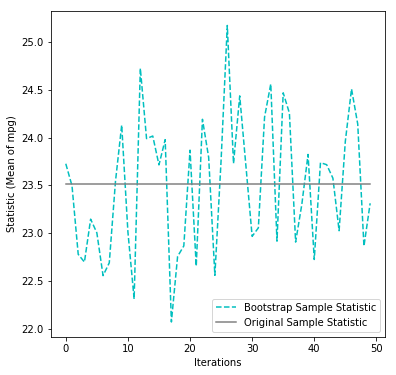

In [17]:
import matplotlib.pyplot as plt
f, ax= plt.subplots(figsize=(6,6))

plt.plot(bootstap_statistics, 'c--', label='Bootstrap Sample Statistic')
plt.plot(originalsample_statistics, 'grey', label='Original Sample Statistic')
plt.xlabel('Iterations')
plt.ylabel('Statistic (Mean of mpg)')
plt.legend(loc=4)
plt.show()

## Build models on bootstrap samples

In [18]:
iteration=50
mse_each_iterations = list()
lm=SGDRegressor()
total_mse=0
average_mse= list()

for i in range(iteration):
    create_bootstrap_oob(df_autodata)
    X_BS = df_bootstrap_sample.iloc[:,1:8] #Bootstrap sample features
    Y_BS = df_bootstrap_sample.iloc[:,0] #Bootstrap sample response variable

    X_OOB = df_OOB.iloc[:,1:8] #OOB sample features
    Y_OOB = df_OOB.iloc[:,0] #OOB sample response variable    
    
    # fit your model with bootstrap sample
    lm=SGDRegressor()
    lm.fit(X_BS, Y_BS)
    
    # test your model on out-of-bag sample 
    predictedvalues = lm.predict(X_OOB)
    
    # capture MSE for the predicted values against OOB actuals
    mse = mean_squared_error(Y_OOB, predictedvalues)
    
    # create a list of mse values
    mse_each_iterations.append(mse) 


In [19]:
 predictedvalues

array([1.54306885e+16, 1.63588772e+16, 1.51953528e+16, 1.51956776e+16,
       1.92847655e+16, 1.94258883e+16, 1.97248166e+16, 1.71400506e+16,
       1.59801175e+16, 1.67765544e+16, 1.42016040e+16, 1.01692909e+16,
       1.20811803e+16, 1.13050324e+16, 7.87550248e+15, 1.13926579e+16,
       1.03877876e+16, 9.63526454e+15, 1.90722194e+16, 1.91357535e+16,
       2.05271269e+16, 9.11960303e+15, 9.79969691e+15, 9.57529257e+15,
       8.77926795e+15, 1.16025051e+16, 1.49055176e+16, 1.45219004e+16,
       1.44028379e+16, 1.42999871e+16, 1.96921245e+16, 1.82554462e+16,
       1.79175306e+16, 2.16707841e+16, 2.08520980e+16, 2.24805048e+16,
       1.03818790e+16, 1.43280689e+16, 1.37305581e+16, 9.14779294e+15,
       8.82392109e+15, 8.81741670e+15, 7.55568388e+15, 6.90127535e+15,
       7.88037221e+15, 9.78133200e+15, 9.09919931e+15, 9.60854488e+15,
       1.03932862e+16, 9.58742787e+15, 1.87552115e+16, 1.93661300e+16,
       1.80782718e+16, 1.61275425e+16, 2.04953811e+16, 1.95026217e+16,
      

## Evaluate models built on Bootstrap samples

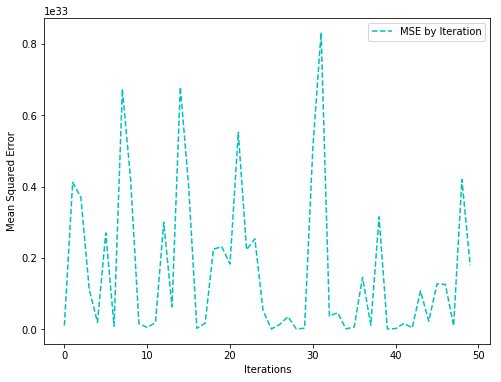

In [20]:
import matplotlib.pyplot as plt
f, ax= plt.subplots(figsize=(8,6))

plt.plot(mse_each_iterations, 'c--', label='MSE by Iteration')

plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.legend(loc=1)
plt.show()

## Bagging Classifier
### Using BaggingClassifier on Decision Tree model on Wine Data

In [21]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [22]:
df_winedata = pd.read_csv('winedata.csv')
df_winedata.shape

(177, 14)

In [23]:
X = df_winedata.iloc[:,1:14]
Y = df_winedata.iloc[:,0]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

In [24]:
dt_model = DecisionTreeClassifier(criterion='entropy')
bag_dt_model = BaggingClassifier(dt_model, max_features=1.0, n_estimators=5, \
                                 random_state=1, bootstrap=True)

In [73]:
bag_dt_model.fit(X_train, Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=5, n_jobs=None, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

In [27]:
bag_dt_model.score(X_test, Y_test)

0.9111111111111111

In [28]:
predictedvalues = bag_dt_model.predict(X_test)

In [29]:
# code from 
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actuals')
    plt.xlabel('Predicted')

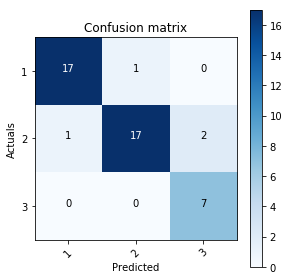

In [30]:
target_names = [ '1', '2', '3']

# Formulating the Confusion Matrix
import itertools
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, predictedvalues)

plt.figure(figsize=(4,4))
plot_confusion_matrix(cm, classes=target_names, normalize=False)
plt.show()

### Using grid search & multiple classifier on Wine Data

In [31]:
from sklearn.model_selection import GridSearchCV

param_values = {'n_estimators': [10, 20, 25, 30], 'base_estimator__max_leaf_nodes':[5, 10, 15, 20], 'base_estimator__max_depth':[3, 4, 5]}

dt_model = DecisionTreeClassifier()
bag_dt_model_grid = BaggingClassifier(base_estimator=dt_model, oob_score=True, bootstrap=True, random_state=1) 

# Use GridSearchCV() to determine best parameters
bc_grid = GridSearchCV(estimator=bag_dt_model_grid, param_grid=param_values, cv=20, n_jobs=-1)
bc_grid.fit(X_train, Y_train)
best_params = bc_grid.best_params_
print(best_params)

{'base_estimator__max_depth': 3, 'base_estimator__max_leaf_nodes': 10, 'n_estimators': 20}


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [25]:
best_dt_model = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, max_depth=3)                   
final_bag_dt_model = BaggingClassifier(base_estimator=best_dt_model, n_estimators=150, bootstrap=True, random_state=1, oob_score=True)

In [33]:
final_bag_dt_model.fit(X_train, Y_train)
bag_predictedvalues = final_bag_dt_model.predict(X_test)

# compare OOB accuracy to test-set accuracy
acc_oob = final_bag_dt_model.oob_score_
print(acc_oob)  

0.9545454545454546


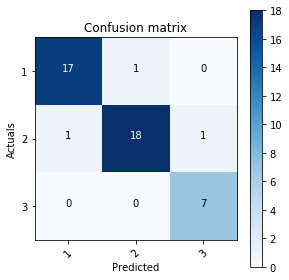

In [498]:
cm = confusion_matrix(Y_test, bag_predictedvalues)

plt.figure(figsize=(4,4))
plot_confusion_matrix(cm, classes=target_names, normalize=False)
plt.show()

## Bagging Regressor
### Using Decision Tree Regressor on Boston data

#### Data Description

In [74]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [75]:
df_housingdata = pd.read_csv('bostonhousing.csv')
df_housingdata.shape

(333, 15)

In [76]:
df_housingdata.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [77]:
X = df_housingdata.iloc[:,1:14]
Y = df_housingdata.iloc[:,-1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

In [78]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43


In [79]:
Y.head()

0    24.0
1    21.6
2    33.4
3    36.2
4    22.9
Name: medv, dtype: float64

In [623]:
dt_model = DecisionTreeRegressor()
bag_dt_model = BaggingRegressor(dt_model, max_features=1.0, n_estimators=30, bootstrap=True, random_state=1, )

In [624]:
bag_dt_model.fit(X_train, Y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=30, n_jobs=1, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

In [625]:
bag_dt_model.score(X_test, Y_test)

0.82224534363352664

In [626]:
predictedvalues = bag_dt_model.predict(X_test)

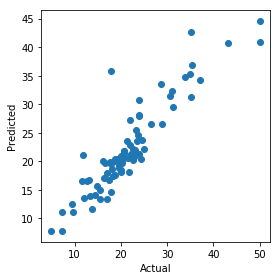

In [627]:
# We can plot the actuals and the predicted values 
plt.figure(figsize=(4, 4))
plt.scatter(Y_test, predictedvalues)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.tight_layout()